In [1]:
# Importing the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as      plt
import statsmodels.tools.eval_measures as em
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display import display
from   pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
import sklearn
import statsmodels
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data & Telling Python that the column 'YearMonth' is time series & Making time column as index. By making index work gets easy
bgl = pd.read_csv('Shoe-Sales.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [3]:
bgl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [4]:
bgl.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


In [5]:
bgl.tail()

,Shoe_Sales
YearMonth,
1995-03-01,188
1995-04-01,195
1995-05-01,189
1995-06-01,220
1995-07-01,274


In [6]:
#descriptive statistics information
round(bgl.describe(),3)

,Shoe_Sales
count,187.000
mean,245.636
std,121.391
min,85.000
25%,143.500
50%,220.000
75%,315.500
max,662.000


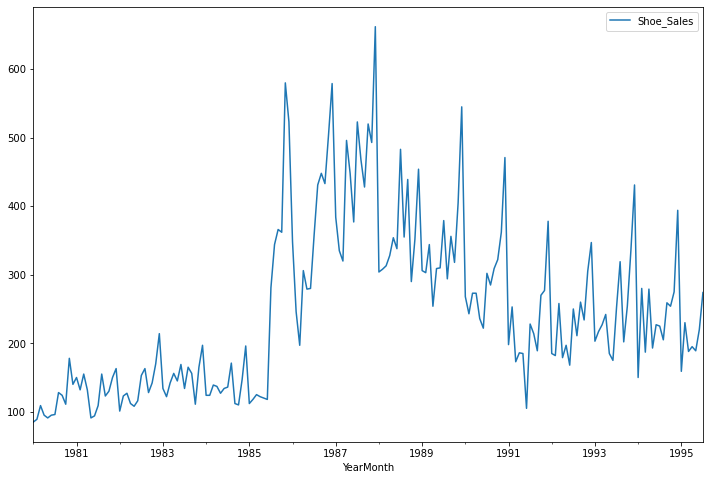

In [7]:
#Visualization the data: Plot the time series
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
bgl.plot()
plt.show()

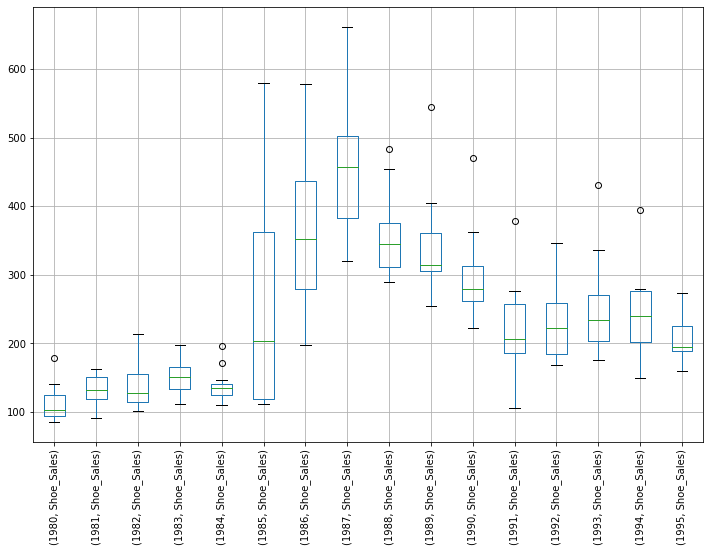

In [8]:
fig, axe = plt.subplots()
bgl.loc[:,[('Shoe_Sales')]].groupby(bgl.index.map(lambda x: x.year)).boxplot(ax=axe, subplots=False, rot=90)
plt.show()

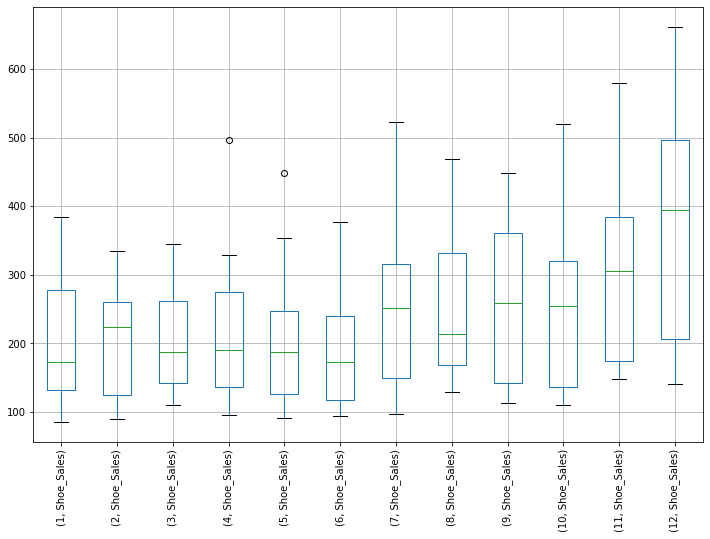

In [9]:
fig, axe = plt.subplots()
bgl.loc[:,[('Shoe_Sales')]].groupby(bgl.index.map(lambda x: x.month)).boxplot(ax=axe, subplots=False, rot=90)
plt.show()

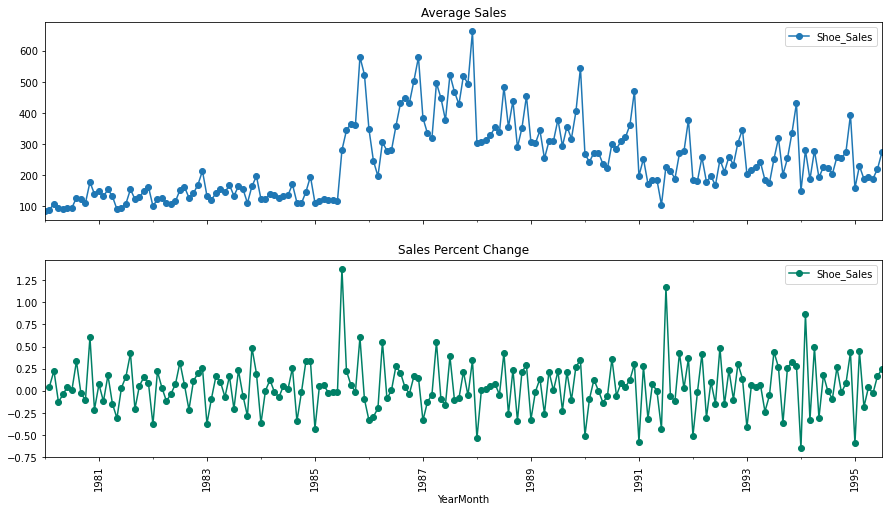

In [10]:
# group by date and get average Customers, and precent change
average_sales    = bgl.groupby('YearMonth')["Shoe_Sales"].mean()
pct_change_sales = bgl.groupby('YearMonth')["Shoe_Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)
# plot precent change for Customers over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")

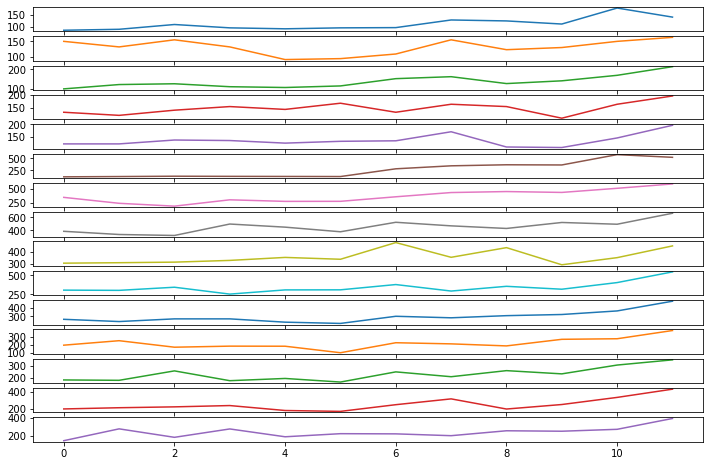

In [11]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('Shoe-Sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.drop(series.tail(7).index,inplace=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

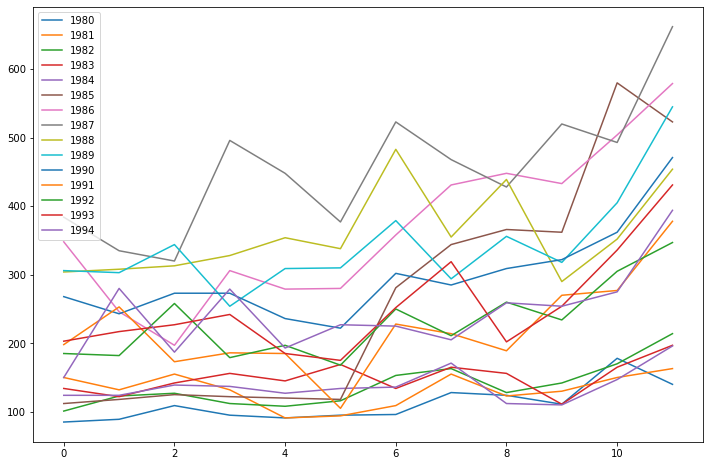

In [12]:
years.plot()
pyplot.show()

In [13]:
#Decompose the time series additively
bgl_add_decompose = seasonal_decompose(bgl, model = 'additive', period = 12)

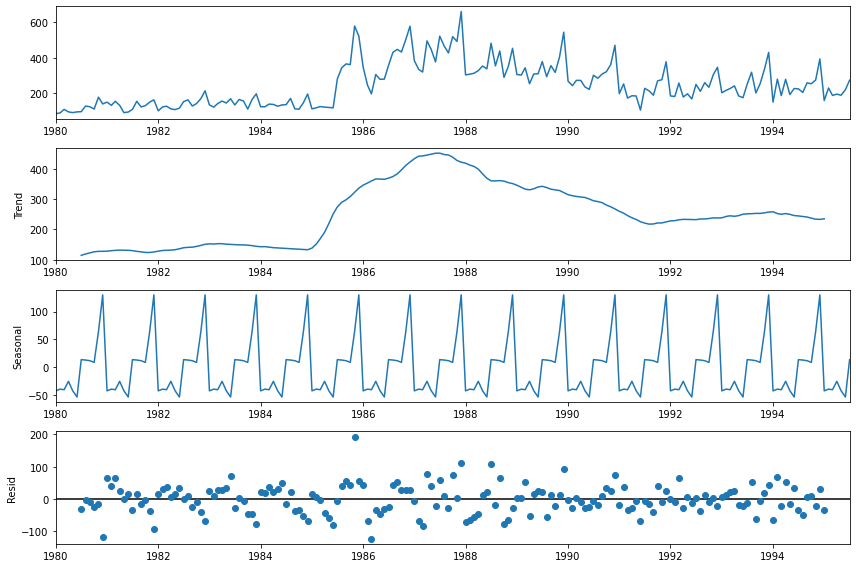

In [14]:
#Plot the decomposed series
bgl_add_decompose.plot()
plt.show()

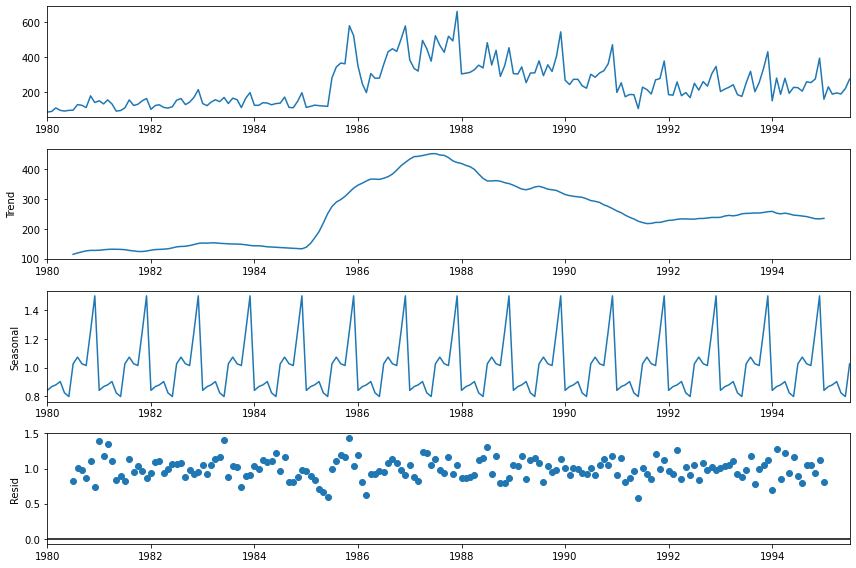

In [15]:
#Decompose the time series multiplicative
bgl_mul_decompose = seasonal_decompose(bgl, model = 'multiplicative', period = 12)
#Plotting the graph
bgl_mul_decompose.plot()
plt.show()

In [16]:
#How to understand which one is good for us. Is it additive or multiplicative

In [17]:
#Let's try to do log transformation
bgl_log = bgl.copy()

In [18]:
bgl_log['Pax'] = np.log(bgl)

In [19]:
bgl_log.Pax

YearMonth
1980-01-01    4.442651
1980-02-01    4.488636
1980-03-01    4.691348
1980-04-01    4.553877
1980-05-01    4.510860
                ...   
1995-03-01    5.236442
1995-04-01    5.273000
1995-05-01    5.241747
1995-06-01    5.393628
1995-07-01    5.613128
Name: Pax, Length: 187, dtype: float64

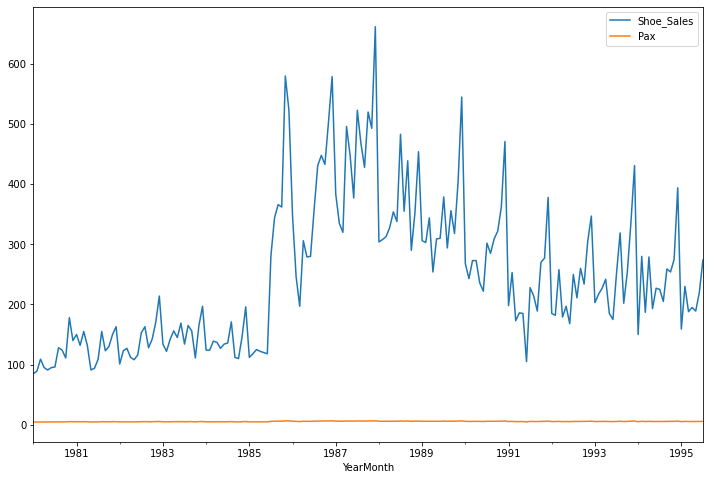

In [20]:
#Visualize the log transformed series
bgl_log.plot()
plt.show()

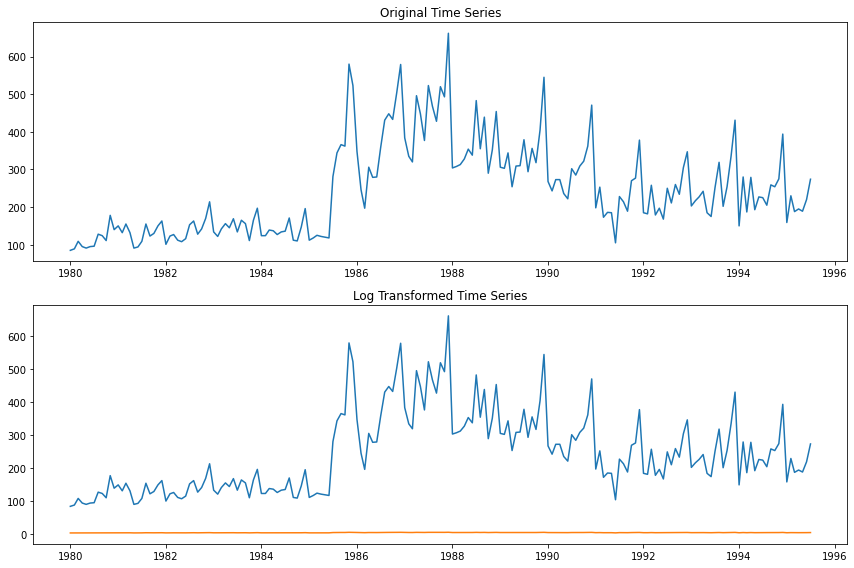

In [21]:
#Compare with original
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(bgl)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(bgl_log)
plt.tight_layout()

Split the data into train and test and plot the training and test data. The test data should start in 1991

In [22]:
train = bgl[bgl.index<'1991'] 
test = bgl[bgl.index>='1991']

In [23]:
train.head(5)

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


In [24]:
test.head()

,Shoe_Sales
YearMonth,
1991-01-01,198
1991-02-01,253
1991-03-01,173
1991-04-01,186
1991-05-01,185


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  55 non-null     int64
dtypes: int64(1)
memory usage: 880.0 bytes


In [27]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [28]:
132+55

187

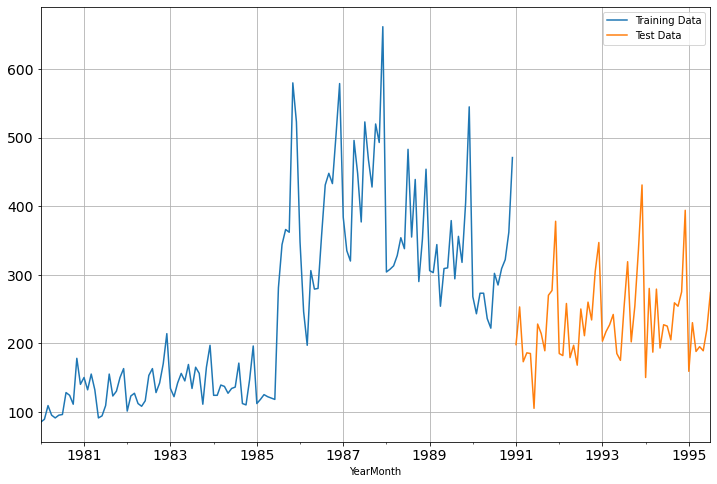

In [29]:
train['Shoe_Sales'].plot(fontsize=14)
test['Shoe_Sales'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

### SES -  ETS(A, N, N) (Level, No Seasonality, No Trend) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [30]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [31]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [32]:
## Let us check the parameters
model_SES_autofit.params

{'smoothing_level': 0.605049221658923,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.83028430097019,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Value of Alpha (Smoothing_Level) is 0.605049.

In [33]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    420.229857
1991-02-01    420.229857
1991-03-01    420.229857
1991-04-01    420.229857
1991-05-01    420.229857
1991-06-01    420.229857
1991-07-01    420.229857
1991-08-01    420.229857
1991-09-01    420.229857
1991-10-01    420.229857
1991-11-01    420.229857
1991-12-01    420.229857
1992-01-01    420.229857
1992-02-01    420.229857
1992-03-01    420.229857
1992-04-01    420.229857
1992-05-01    420.229857
1992-06-01    420.229857
1992-07-01    420.229857
1992-08-01    420.229857
1992-09-01    420.229857
1992-10-01    420.229857
1992-11-01    420.229857
1992-12-01    420.229857
1993-01-01    420.229857
1993-02-01    420.229857
1993-03-01    420.229857
1993-04-01    420.229857
1993-05-01    420.229857
1993-06-01    420.229857
1993-07-01    420.229857
1993-08-01    420.229857
1993-09-01    420.229857
1993-10-01    420.229857
1993-11-01    420.229857
1993-12-01    420.229857
1994-01-01    420.229857
1994-02-01    420.229857
1994-03-01    420.229857
1994-04-01    420.229857


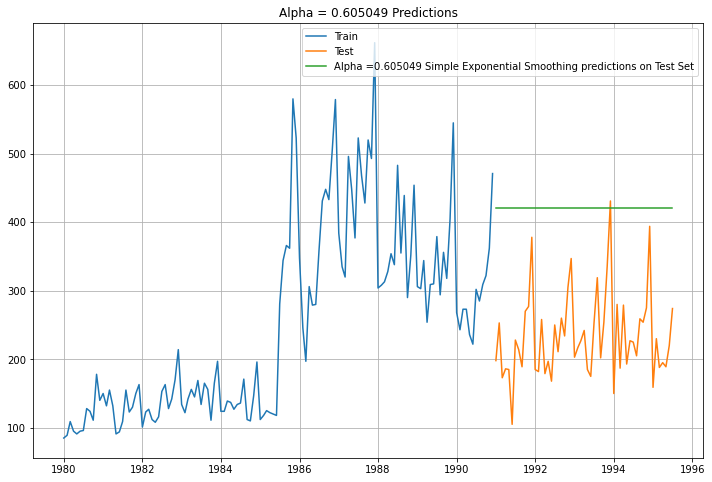

In [34]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.605049 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.605049 Predictions');

In [35]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [36]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 196.404836419672
SES RMSE (calculated using statsmodels): 196.404836419672


In [37]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.605049,SES'])
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836


## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [38]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()
print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5948061323729839, 'smoothing_trend': 0.000279646480657923, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 82.93815017865691, 'initial_trend': 2.5254544148321547, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Value of Alpha (Smoothing_Level) is 0.594806
Value of Beta (Smoothing_Trend) is 0.000279

In [39]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    422.870987
1991-02-01    425.397576
1991-03-01    427.924166
1991-04-01    430.450755
1991-05-01    432.977344
1991-06-01    435.503934
1991-07-01    438.030523
1991-08-01    440.557112
1991-09-01    443.083702
1991-10-01    445.610291
1991-11-01    448.136881
1991-12-01    450.663470
1992-01-01    453.190059
1992-02-01    455.716649
1992-03-01    458.243238
1992-04-01    460.769827
1992-05-01    463.296417
1992-06-01    465.823006
1992-07-01    468.349596
1992-08-01    470.876185
1992-09-01    473.402774
1992-10-01    475.929364
1992-11-01    478.455953
1992-12-01    480.982543
1993-01-01    483.509132
1993-02-01    486.035721
1993-03-01    488.562311
1993-04-01    491.088900
1993-05-01    493.615489
1993-06-01    496.142079
1993-07-01    498.668668
1993-08-01    501.195258
1993-09-01    503.721847
1993-10-01    506.248436
1993-11-01    508.775026
1993-12-01    511.301615
1994-01-01    513.828204
1994-02-01    516.354794
1994-03-01    518.881383
1994-04-01    521.407973


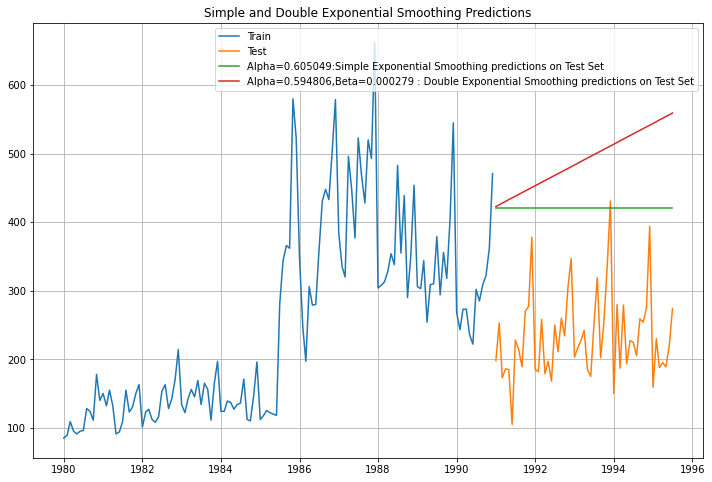

In [40]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.605049:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.594806,Beta=0.000279 : Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [41]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 266.16120808183047


In [42]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]},index=['Alpha=1,Beta=0.0189:DES'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836
"Alpha=1,Beta=0.0189:DES",266.161208


### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [43]:
# Initializing the Triple Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5707142857142857, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.29372180451127816, 'damping_trend': nan, 'initial_level': 116.47499999999994, 'initial_trend': 1.6939393939394016, 'initial_seasons': array([-11.20138889, -14.06597222,   1.11111111,  -5.25347222,
       -21.42013889, -11.18055556, -10.83680556,  18.14236111,
        -2.53472222, -12.53472222,  28.90277778,  40.87152778]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Value of Alpha: 0.5707 Value of Beta: 0.0001 Value of Gamma: 0.2937

In [44]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    219.083658
1991-02-01    213.816321
1991-03-01    246.658224
1991-04-01    267.260236
1991-05-01    287.719744
1991-06-01    286.532259
1991-07-01    380.493545
1991-08-01    339.555860
1991-09-01    372.342545
1991-10-01    344.012031
1991-11-01    392.660570
1991-12-01    483.619562
1992-01-01    239.374793
1992-02-01    234.107456
1992-03-01    266.949358
1992-04-01    287.551371
1992-05-01    308.010879
1992-06-01    306.823393
1992-07-01    400.784679
1992-08-01    359.846995
1992-09-01    392.633680
1992-10-01    364.303165
1992-11-01    412.951705
1992-12-01    503.910697
1993-01-01    259.665928
1993-02-01    254.398590
1993-03-01    287.240493
1993-04-01    307.842506
1993-05-01    328.302014
1993-06-01    327.114528
1993-07-01    421.075814
1993-08-01    380.138129
1993-09-01    412.924815
1993-10-01    384.594300
1993-11-01    433.242840
1993-12-01    524.201832
1994-01-01    279.957063
1994-02-01    274.689725
1994-03-01    307.531628
1994-04-01    328.133640


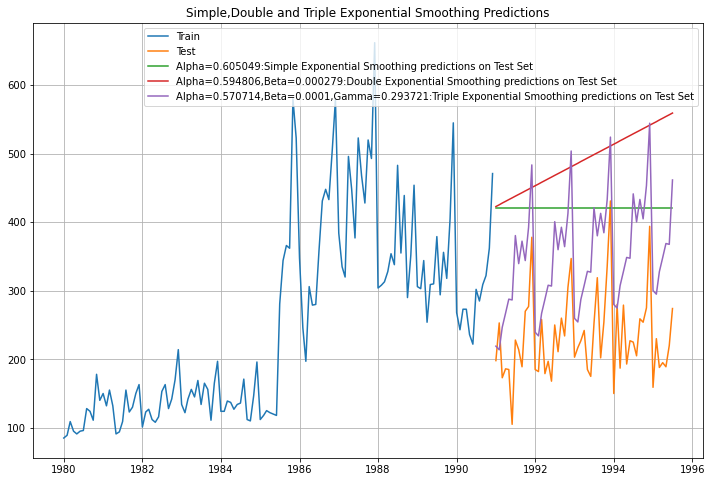

In [45]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.605049:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.594806,Beta=0.000279:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.570714,Beta=0.0001,Gamma=0.293721:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [46]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 128.99252592312354


In [47]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]},index=['Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836
"Alpha=1,Beta=0.0189:DES",266.161208
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",128.992526


### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

In [48]:
# Initializing the Triple Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5711286329525818, 'smoothing_trend': 0.00014781930867568429, 'smoothing_seasonal': 0.20294733706077994, 'damping_trend': nan, 'initial_level': 116.35529208070726, 'initial_trend': 0.11219854465675648, 'initial_seasons': array([1.05679343, 1.01130311, 1.2337466 , 1.40663129, 1.32162715,
       1.07936886, 1.18018187, 1.50183082, 1.72369093, 1.4704132 ,
       1.75485304, 1.92101444]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Value of Alpha: 0.571128 Value of Beta: 0.000147 Value of Gamma: 0.202947

In [49]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    261.342543
1991-02-01    243.085370
1991-03-01    256.996702
1991-04-01    270.198135
1991-05-01    267.375606
1991-06-01    256.946321
1991-07-01    339.585163
1991-08-01    315.726553
1991-09-01    340.179286
1991-10-01    314.977543
1991-11-01    376.103895
1991-12-01    466.476288
1992-01-01    263.151144
1992-02-01    244.766655
1992-03-01    258.773180
1992-04-01    272.064791
1992-05-01    269.221701
1992-06-01    258.719386
1992-07-01    341.927133
1992-08-01    317.902729
1992-09-01    342.522659
1992-10-01    317.146066
1992-11-01    378.691770
1992-12-01    469.684153
1993-01-01    264.959745
1993-02-01    246.447939
1993-03-01    260.549657
1993-04-01    273.931448
1993-05-01    271.067795
1993-06-01    260.492451
1993-07-01    344.269103
1993-08-01    320.078906
1993-09-01    344.866033
1993-10-01    319.314589
1993-11-01    381.279644
1993-12-01    472.892017
1994-01-01    266.768347
1994-02-01    248.129224
1994-03-01    262.326135
1994-04-01    275.798104


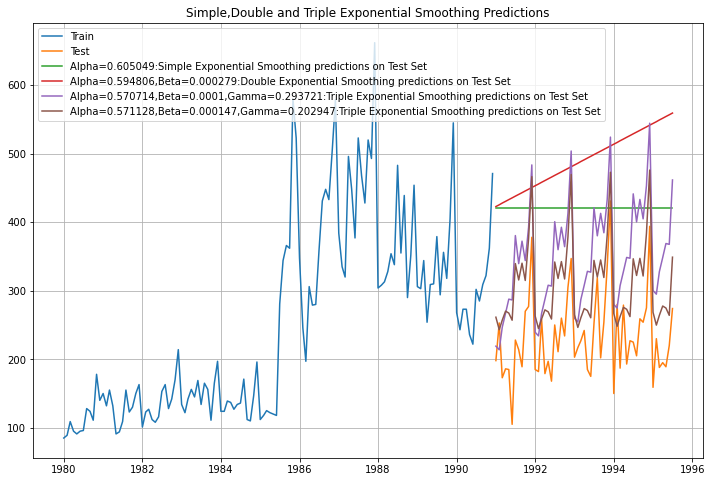

In [50]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.605049:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.594806,Beta=0.000279:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.570714,Beta=0.0001,Gamma=0.293721:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.571128,Beta=0.000147,Gamma=0.202947:Triple Exponential Smoothing predictions on Test Set')
 
plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Report model accuracy

In [51]:
print('TES_Multiplicative RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_Multiplicative RMSE: 83.734048494837


In [52]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]},index=['Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836
"Alpha=1,Beta=0.0189:DES",266.161208
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",128.992526
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",83.734048


We can see that the Triple Exponential Smoothing Multiplicative model has performed the best.

## Building different models and comparing the accuracy metrics

### Model 1: Linear Regrression

In [53]:
print(bgl.shape)
print(train.shape)
print(test.shape)

(187, 1)
(132, 1)
(55, 1)


In [54]:
#We will take YearMonth as the independent variable and Shoe_Sales as dependent variable
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time Instance','\n',train_time)
print('Test Time Instance','\n',test_time)

Training Time Instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [55]:
print(len(train_time))
print(len(test_time))

132
55


In [56]:
#Taking the back up of the data
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [57]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

Now that our training and test data has been modified, let us go ahead and use Linear Regression to build the model on the training data and test the model on the test data

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'])

LinearRegression()

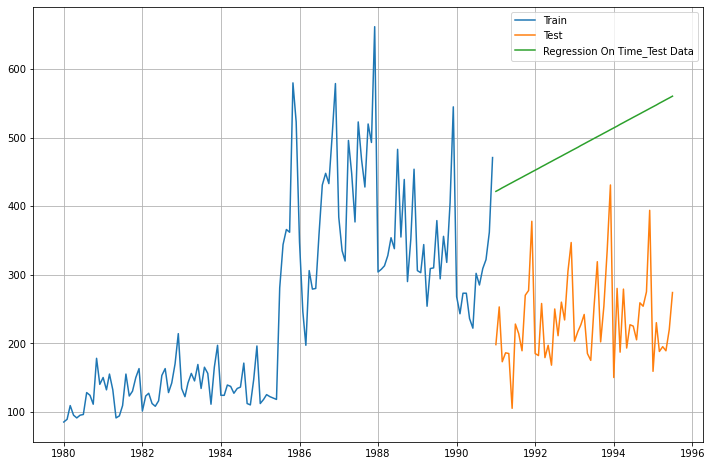

In [61]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

Defining the functions for calculating the accuracy metrics


In [62]:
from sklearn import metrics

### Model Evaluation

In [63]:
rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 266.276 


In [64]:
resultsDf_1 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836
"Alpha=1,Beta=0.0189:DES",266.161208
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",128.992526
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",83.734048
RegressionOnTime,266.276472


# Model 2: Naive Approach: y^t+1=yt

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [65]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [66]:
train.tail()

,Shoe_Sales
YearMonth,
1990-08-01,285
1990-09-01,309
1990-10-01,322
1990-11-01,362
1990-12-01,471


In [67]:
NaiveModel_test['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    471
1991-02-01    471
1991-03-01    471
1991-04-01    471
1991-05-01    471
Name: naive, dtype: int64

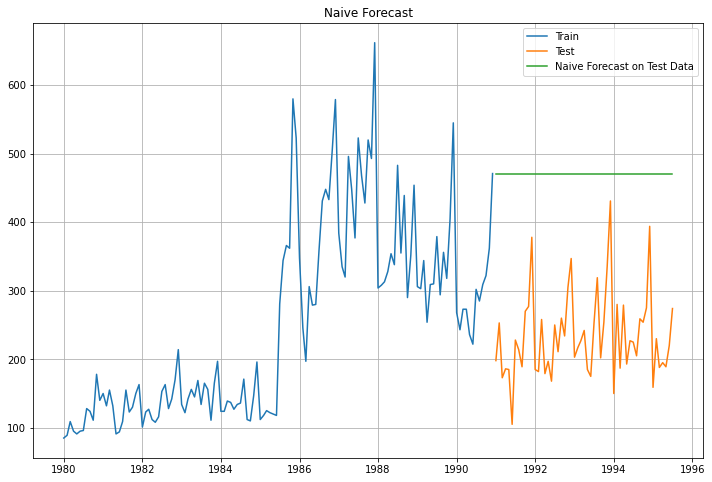

In [68]:
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Model Evaluation

In [69]:
rmse_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 245.121


In [70]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836
"Alpha=1,Beta=0.0189:DES",266.161208
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",128.992526
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",83.734048
RegressionOnTime,266.276472
NaiveModel,245.121306


# Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [71]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [72]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

,Shoe_Sales,mean_forecast
YearMonth,,
1991-01-01,198,250.575758
1991-02-01,253,250.575758
1991-03-01,173,250.575758
1991-04-01,186,250.575758
1991-05-01,185,250.575758


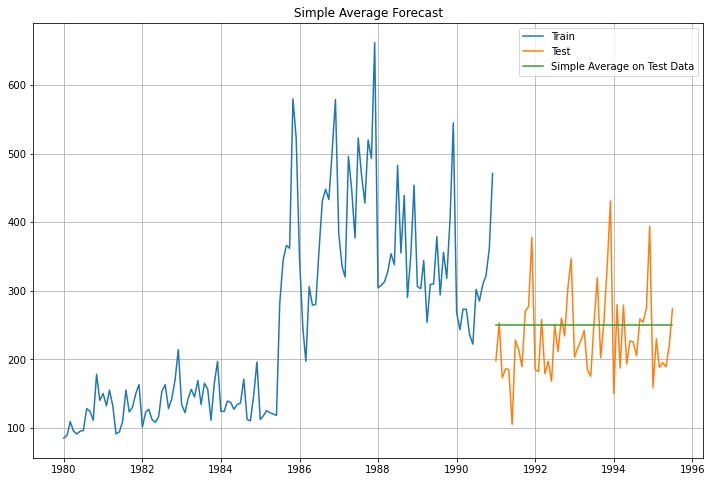

In [73]:
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Model Evaluation

In [74]:
rmse_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 63.985


In [75]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836
"Alpha=1,Beta=0.0189:DES",266.161208
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",128.992526
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",83.734048
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570


# Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [76]:
MovingAverage = bgl.copy()
MovingAverage.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


Trailing moving averages

In [77]:
MovingAverage['Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Shoe_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Shoe_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Shoe_Sales'].rolling(9).mean()

MovingAverage.head()

,Shoe_Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,85,NaN,NaN,NaN,NaN
1980-02-01,89,87.0,NaN,NaN,NaN
1980-03-01,109,99.0,NaN,NaN,NaN
1980-04-01,95,102.0,94.5,NaN,NaN
1980-05-01,91,93.0,96.0,NaN,NaN


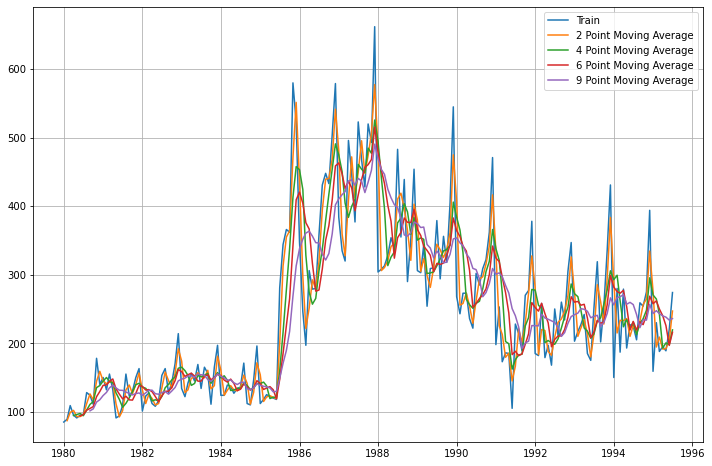

In [78]:
## Plotting on the whole data

plt.plot(MovingAverage['Shoe_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [79]:
#Creating train and test set
trailing_MovingAverage_train = MovingAverage[MovingAverage.index<'1991']
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

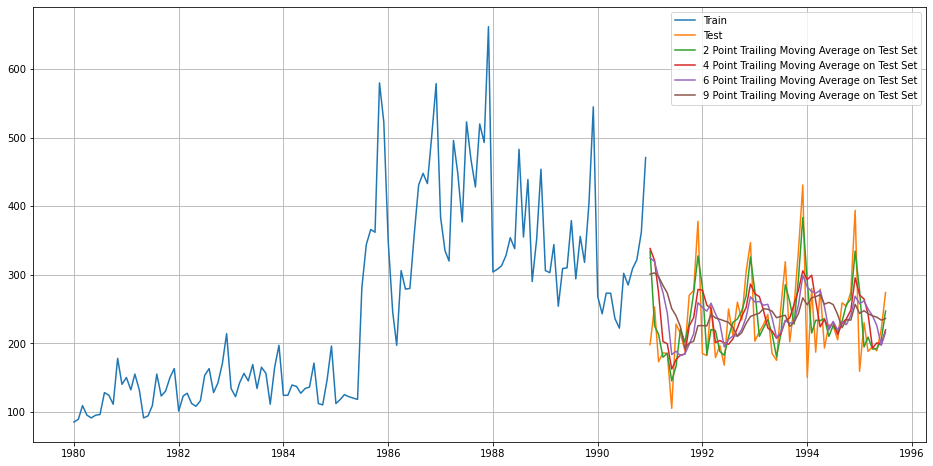

In [80]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Shoe_Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Shoe_Sales'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

Model Evaluation

Done only on the test data.

In [81]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 45.949
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 57.873
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 63.457
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 67.724


In [82]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4,rmse_model4_test_6,rmse_model4_test_9]},index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage','6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836
"Alpha=1,Beta=0.0189:DES",266.161208
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",128.992526
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",83.734048
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
2pointTrailingMovingAverage,45.948736
4pointTrailingMovingAverage,57.872686
6pointTrailingMovingAverage,63.456893


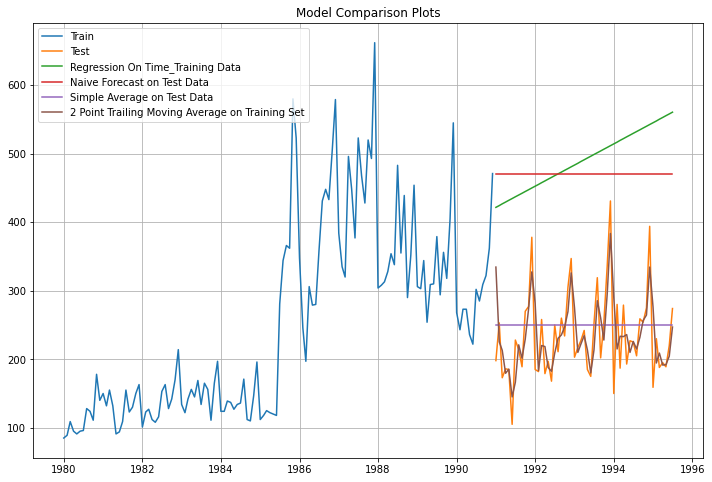

In [83]:
## Plotting on both Training and Test data

plt.plot(train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [84]:
from statsmodels.tsa.stattools import adfuller

In [85]:
dftest = adfuller(bgl,regression='ct')
print('DataFrame test statistic is %3.3f' %dftest[0])
print('DataFrame test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DataFrame test statistic is -1.577
DataFrame test p-value is 0.8014186234536529
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over $\href{https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html}{here}$.

Let us take one level of differencing to see whether the series becomes stationary.


In [86]:
bgl.diff().dropna()
dftest = adfuller(bgl.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.532
DF test p-value is 0.03611703400135922
Number of lags used 12


Now, let us go ahead and plot the stationary series.

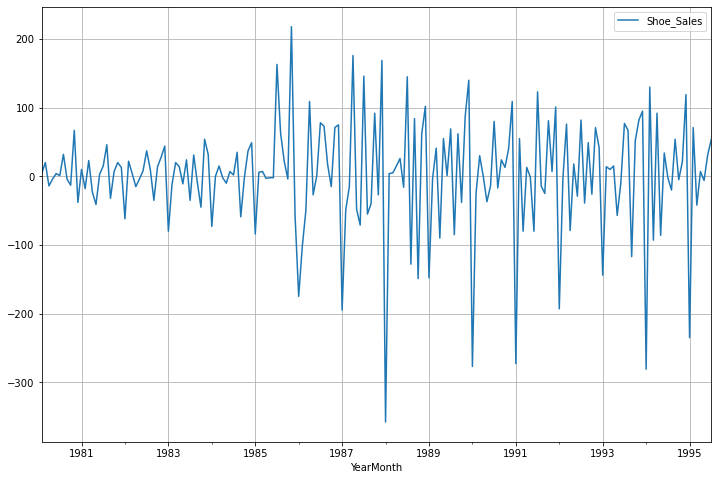

In [87]:
bgl.diff().dropna().plot(grid=True);

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

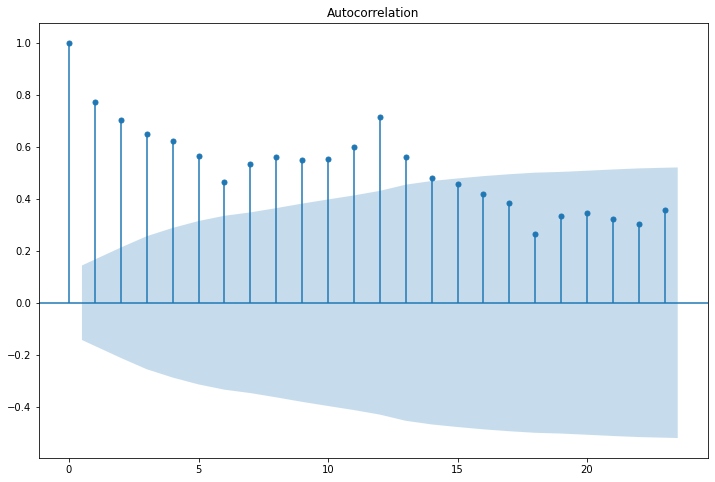

In [89]:
plot_acf(bgl,alpha=0.05);

From the above plots, we can say that there seems to be a seasonality in the data.


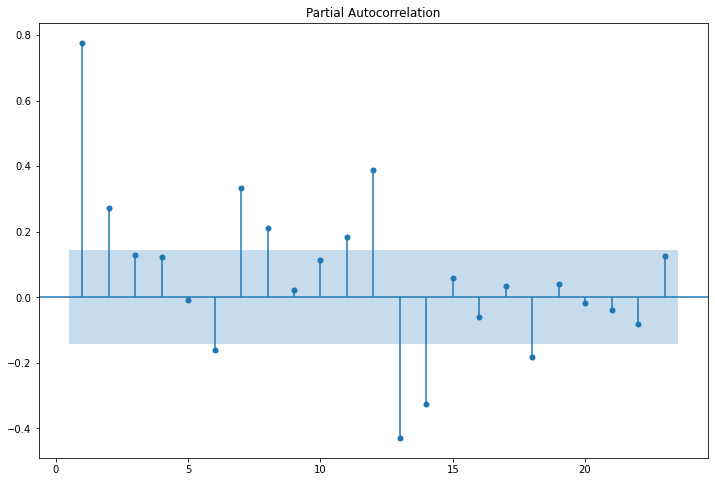

In [90]:
plot_pacf(bgl,zero=False,alpha=0.05);

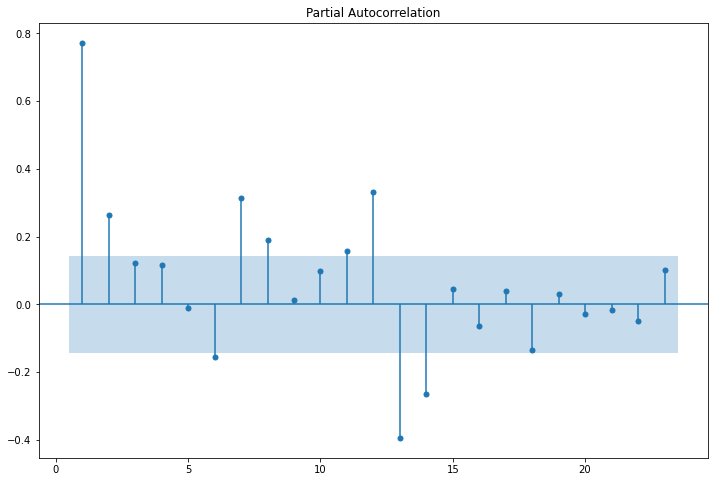

In [91]:
plot_pacf(bgl,zero=False,alpha=0.05,method='ywmle');

In [92]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [93]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


Last few rows of Training Data


,Shoe_Sales
YearMonth,
1990-08-01,285
1990-09-01,309
1990-10-01,322
1990-11-01,362
1990-12-01,471


First few rows of Test Data


,Shoe_Sales
YearMonth,
1991-01-01,198
1991-02-01,253
1991-03-01,173
1991-04-01,186
1991-05-01,185


Last few rows of Test Data


,Shoe_Sales
YearMonth,
1995-03-01,188
1995-04-01,195
1995-05-01,189
1995-06-01,220
1995-07-01,274


In [94]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

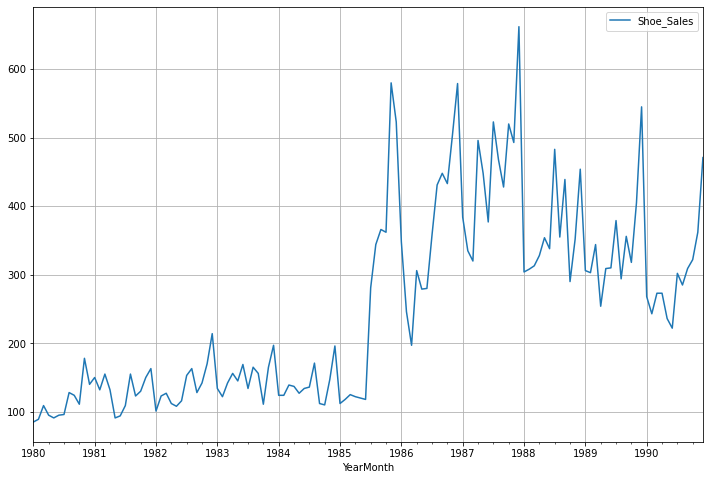

In [95]:
train.plot(grid=True);

In [96]:
dftest = adfuller(train,regression='ct')
print('DataFrame test statistic is %3.3f' %dftest[0])
print('DataFrame test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DataFrame test statistic is -1.749
DataFrame test p-value is 0.7287654522797273
Number of lags used 13


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [97]:
n = train.diff().dropna()
dftest = adfuller(n,regression='ct')
print('DataFrame test statistic is %3.3f' %dftest[0])
print('DataFrame test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DataFrame test statistic is -3.181
DataFrame test p-value is 0.0882258925591975
Number of lags used 13


The training data is non-stationary at 95% confidence level. Let us take a second level of differencing to stationarize the Time Series.

In [98]:
u = n.diff().dropna()
dftest = adfuller(u,regression='ct')
print('DataFrame test statistic is %3.3f' %dftest[0])
print('DataFrame test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DataFrame test statistic is -6.564
DataFrame test p-value is 1.3362283516594626e-07
Number of lags used 13


Now, let us go ahead and plot the differenced training data.

In [99]:
train = u

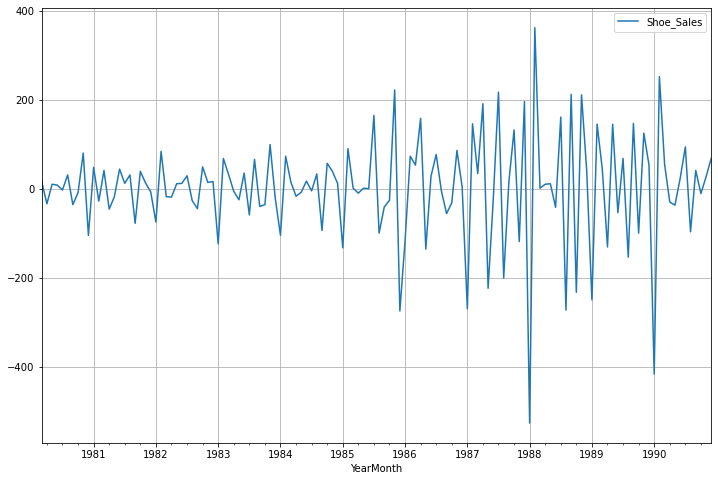

In [100]:
train.plot(grid=True);

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 1980-03-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Shoe_Sales  130 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [102]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 2 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(2,3)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 2, 0)
Model: (0, 2, 1)
Model: (0, 2, 2)
Model: (0, 2, 3)
Model: (1, 2, 0)
Model: (1, 2, 1)
Model: (1, 2, 2)
Model: (1, 2, 3)
Model: (2, 2, 0)
Model: (2, 2, 1)
Model: (2, 2, 2)
Model: (2, 2, 3)
Model: (3, 2, 0)
Model: (3, 2, 1)
Model: (3, 2, 2)
Model: (3, 2, 3)


In [103]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [104]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Shoe_Sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 2, 0) - AIC:1894.29072879556
ARIMA(0, 2, 1) - AIC:1745.4141816798729
ARIMA(0, 2, 2) - AIC:1614.1526200043695
ARIMA(0, 2, 3) - AIC:1516.670058295184
ARIMA(1, 2, 0) - AIC:1786.052880627531
ARIMA(1, 2, 1) - AIC:1667.154779794173
ARIMA(1, 2, 2) - AIC:1568.0286156894736
ARIMA(1, 2, 3) - AIC:1511.5579647953296
ARIMA(2, 2, 0) - AIC:1727.8901467216583
ARIMA(2, 2, 1) - AIC:1628.9244397209254
ARIMA(2, 2, 2) - AIC:1550.279581343846
ARIMA(2, 2, 3) - AIC:1569.0915480922906
ARIMA(3, 2, 0) - AIC:1703.5893067845086
ARIMA(3, 2, 1) - AIC:1606.116538301513
ARIMA(3, 2, 2) - AIC:1632.3773834249255
ARIMA(3, 2, 3) - AIC:1554.2856947389482


In [105]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
7,"(1, 2, 3)",1511.557965
3,"(0, 2, 3)",1516.670058
10,"(2, 2, 2)",1550.279581
15,"(3, 2, 3)",1554.285695
6,"(1, 2, 2)",1568.028616


In [106]:
auto_ARIMA = ARIMA(train, order=(1,2,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  130
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -750.779
Date:                Fri, 07 Jan 2022   AIC                           1511.558
Time:                        11:18:34   BIC                           1525.818
Sample:                    03-01-1980   HQIC                          1517.352
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2365      0.071     -3.317      0.001      -0.376      -0.097
ma.L1         -2.9980      0.085    -35.267      0.000      -3.165      -2.831
ma.L2          2.9965      0.167     17.905      0.0

Diagnostics plot.

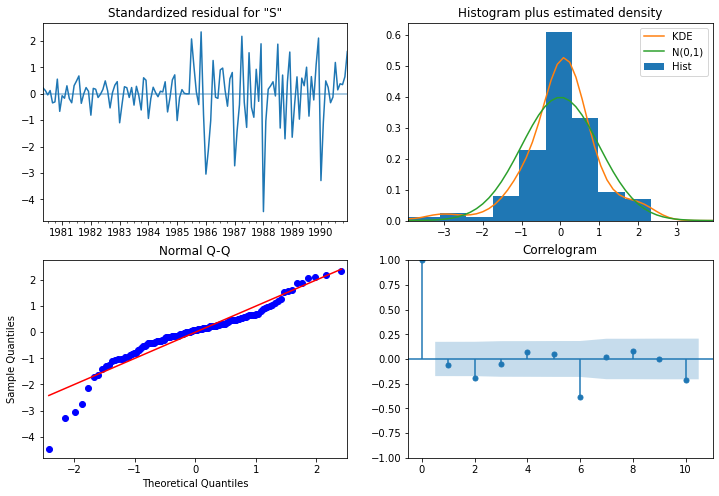

In [107]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [108]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [109]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [110]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 243.9313191324045 
MAPE: 101.05189061285644


In [111]:
resultsDf1 = pd.DataFrame({'RMSE': rmse,'MAPE':mape},index=['ARIMA(1,2,3)'])

resultsDf1

,RMSE,MAPE
"ARIMA(1,2,3)",243.931319,101.051891


In [112]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse]},index=['ARIMA(1,2,3) Lowest AIC'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836
"Alpha=1,Beta=0.0189:DES",266.161208
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",128.992526
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",83.734048
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
2pointTrailingMovingAverage,45.948736
4pointTrailingMovingAverage,57.872686
6pointTrailingMovingAverage,63.456893


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more

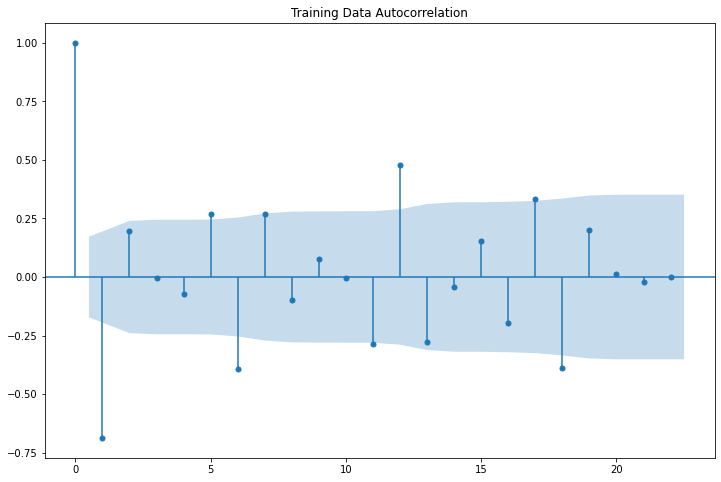

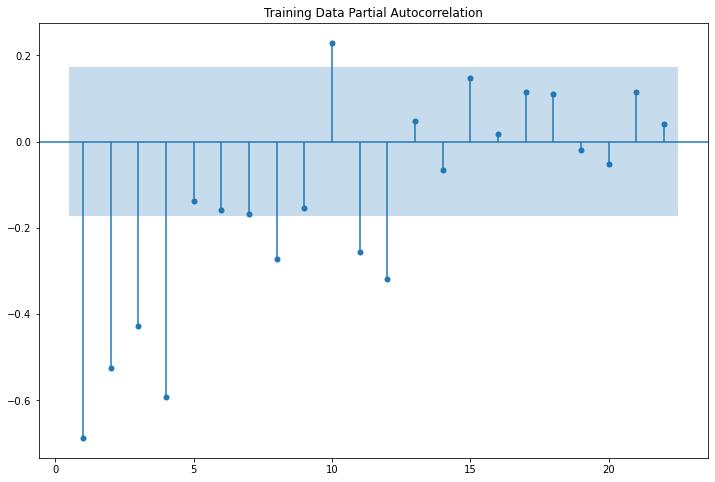

In [113]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 4.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 1.

By looking at the above plots, we will take the value of p and q to be 4 and 1 respectively.

In [114]:
manual_ARIMA = ARIMA(train['Shoe_Sales'], order=(4,2,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  130
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -770.175
Date:                Fri, 07 Jan 2022   AIC                           1552.351
Time:                        11:18:37   BIC                           1569.463
Sample:                    03-01-1980   HQIC                          1559.303
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5262      0.064    -23.888      0.000      -1.651      -1.401
ar.L2         -1.5482      0.097    -15.962      0.000      -1.738      -1.358
ar.L3         -1.1761      0.102    -11.575      0.0

Let us analyse the residuals from the various diagnostics plot.

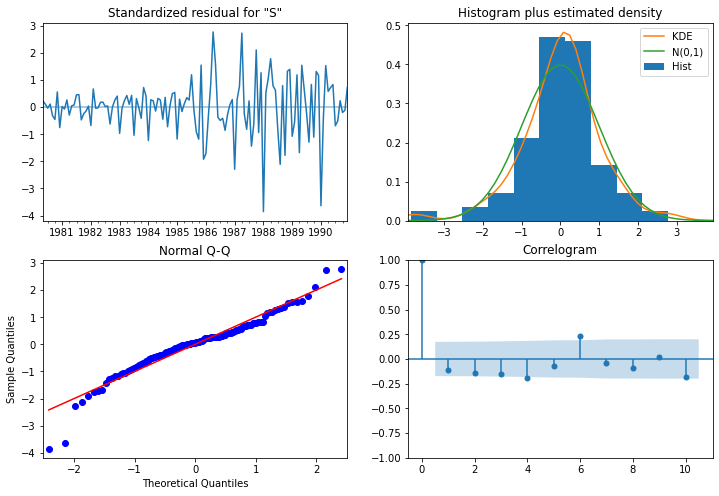

In [115]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [116]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [117]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 224.55680513863803 
MAPE: 92.50022397627056


In [118]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape},index=['ARIMA(4,2,1)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,RMSE,MAPE
"ARIMA(1,2,3)",243.931319,101.051891
"ARIMA(4,2,1)",224.556805,92.500224


In [119]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse]},index=['ARIMA(4,2,1)By looking ACF and PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836
"Alpha=1,Beta=0.0189:DES",266.161208
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",128.992526
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",83.734048
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
2pointTrailingMovingAverage,45.948736
4pointTrailingMovingAverage,57.872686
6pointTrailingMovingAverage,63.456893


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

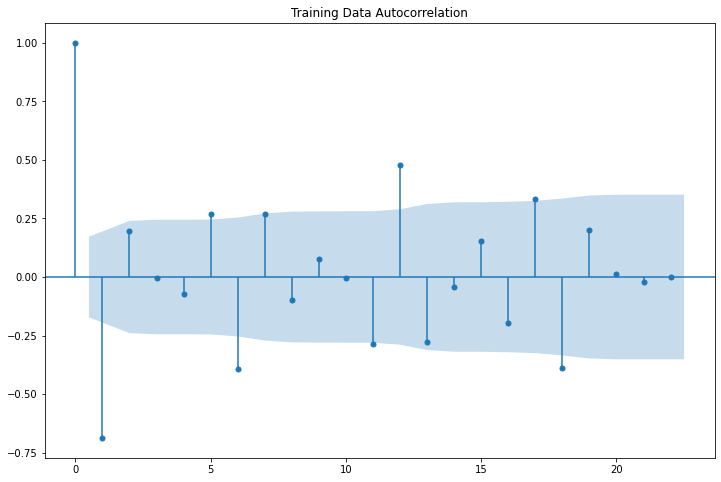

In [120]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality. Seasonality = 6

In [121]:
import itertools
p = q = range(0, 4)
d= range(2,3)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 2, 1)(0, 0, 1, 6)
Model: (0, 2, 2)(0, 0, 2, 6)
Model: (0, 2, 3)(0, 0, 3, 6)
Model: (1, 2, 0)(1, 0, 0, 6)
Model: (1, 2, 1)(1, 0, 1, 6)
Model: (1, 2, 2)(1, 0, 2, 6)
Model: (1, 2, 3)(1, 0, 3, 6)
Model: (2, 2, 0)(2, 0, 0, 6)
Model: (2, 2, 1)(2, 0, 1, 6)
Model: (2, 2, 2)(2, 0, 2, 6)
Model: (2, 2, 3)(2, 0, 3, 6)
Model: (3, 2, 0)(3, 0, 0, 6)
Model: (3, 2, 1)(3, 0, 1, 6)
Model: (3, 2, 2)(3, 0, 2, 6)
Model: (3, 2, 3)(3, 0, 3, 6)


In [122]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [123]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 2, 0)x(0, 0, 0, 6) - AIC:1880.446416345086
SARIMA(0, 2, 0)x(0, 0, 1, 6) - AIC:1787.448866231284
SARIMA(0, 2, 0)x(0, 0, 2, 6) - AIC:1688.3935430691865
SARIMA(0, 2, 0)x(0, 0, 3, 6) - AIC:1602.971130876005
SARIMA(0, 2, 0)x(1, 0, 0, 6) - AIC:1792.411326872125
SARIMA(0, 2, 0)x(1, 0, 1, 6) - AIC:1760.144637538666
SARIMA(0, 2, 0)x(1, 0, 2, 6) - AIC:1676.2589807842692
SARIMA(0, 2, 0)x(1, 0, 3, 6) - AIC:1594.404042489281
SARIMA(0, 2, 0)x(2, 0, 0, 6) - AIC:1691.2638766302512
SARIMA(0, 2, 0)x(2, 0, 1, 6) - AIC:1688.147229084905
SARIMA(0, 2, 0)x(2, 0, 2, 6) - AIC:1676.4461571331508
SARIMA(0, 2, 0)x(2, 0, 3, 6) - AIC:1595.9273286052407
SARIMA(0, 2, 0)x(3, 0, 0, 6) - AIC:1605.3156605806305
SARIMA(0, 2, 0)x(3, 0, 1, 6) - AIC:1607.302598760014
SARIMA(0, 2, 0)x(3, 0, 2, 6) - AIC:1608.9990657617163
SARIMA(0, 2, 0)x(3, 0, 3, 6) - AIC:1592.8289968767522
SARIMA(0, 2, 1)x(0, 0, 0, 6) - AIC:1719.145986831026
SARIMA(0, 2, 1)x(0, 0, 1, 6) - AIC:1633.6235689781695
SARIMA(0, 2, 1)x(0, 0, 2, 6) - AIC:15

SARIMA(2, 2, 1)x(2, 0, 1, 6) - AIC:1388.337258315878
SARIMA(2, 2, 1)x(2, 0, 2, 6) - AIC:1386.8129703163825
SARIMA(2, 2, 1)x(2, 0, 3, 6) - AIC:1319.0204640989048
SARIMA(2, 2, 1)x(3, 0, 0, 6) - AIC:1324.4299844961158
SARIMA(2, 2, 1)x(3, 0, 1, 6) - AIC:1319.5246970902087
SARIMA(2, 2, 1)x(3, 0, 2, 6) - AIC:1320.43103239154
SARIMA(2, 2, 1)x(3, 0, 3, 6) - AIC:1320.9731751353165
SARIMA(2, 2, 2)x(0, 0, 0, 6) - AIC:1509.5335231472004
SARIMA(2, 2, 2)x(0, 0, 1, 6) - AIC:1435.5254756019326
SARIMA(2, 2, 2)x(0, 0, 2, 6) - AIC:1342.3387324253229
SARIMA(2, 2, 2)x(0, 0, 3, 6) - AIC:1278.4104227229511
SARIMA(2, 2, 2)x(1, 0, 0, 6) - AIC:1437.5462669890615
SARIMA(2, 2, 2)x(1, 0, 1, 6) - AIC:1391.0205432903335
SARIMA(2, 2, 2)x(1, 0, 2, 6) - AIC:1319.6019939869861
SARIMA(2, 2, 2)x(1, 0, 3, 6) - AIC:1250.5855469748049
SARIMA(2, 2, 2)x(2, 0, 0, 6) - AIC:1327.3440694261367
SARIMA(2, 2, 2)x(2, 0, 1, 6) - AIC:1325.330500029484
SARIMA(2, 2, 2)x(2, 0, 2, 6) - AIC:1311.6394073178121
SARIMA(2, 2, 2)x(2, 0, 3, 6) - A

In [124]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
119,"(1, 2, 3)","(1, 0, 3, 6)",1210.851397
251,"(3, 2, 3)","(2, 0, 3, 6)",1215.919751
183,"(2, 2, 3)","(1, 0, 3, 6)",1216.950935
59,"(0, 2, 3)","(2, 0, 3, 6)",1219.433624
255,"(3, 2, 3)","(3, 0, 3, 6)",1220.102387


In [125]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(1, 2, 3),
                                seasonal_order=(1, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  130
Model:             SARIMAX(1, 2, 3)x(1, 0, 3, 6)   Log Likelihood                -596.426
Date:                           Fri, 07 Jan 2022   AIC                           1210.851
Time:                                   11:27:48   BIC                           1234.822
Sample:                               03-01-1980   HQIC                          1220.567
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3239      0.094     -3.434      0.001      -0.509      -0.139
ma.L1         -2.9465      0.316     -9.322

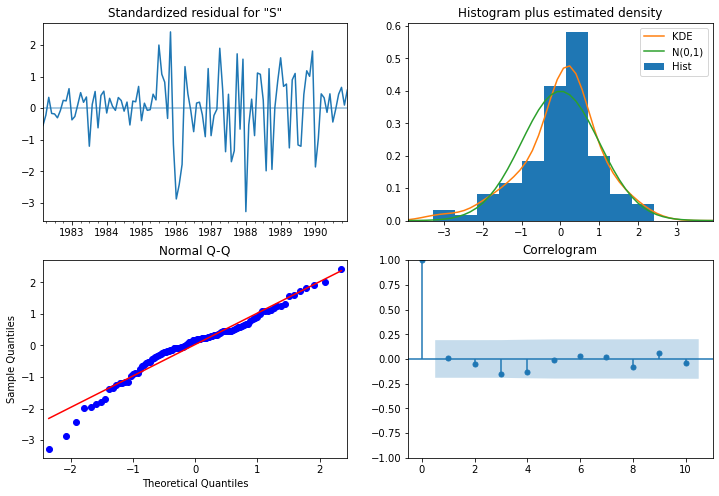

In [126]:
results_auto_SARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [127]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [128]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,-340.689253,60.660714,-459.582068,-221.796439
1991-02-01,219.755399,98.007925,27.663396,411.847402
1991-03-01,8.730022,101.203884,-189.625945,207.085989
1991-04-01,20.550351,101.492721,-178.371726,219.472428
1991-05-01,-76.343622,101.494064,-275.268331,122.581088


In [129]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 270.7848081031495 
MAPE: 105.69636589335285


In [130]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,2,3)(1,0,3,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,RMSE,MAPE
"ARIMA(1,2,3)",243.931319,101.051891
"ARIMA(4,2,1)",224.556805,92.500224
"SARIMA(1,2,3)(1,0,3,6)",270.784808,105.696366


In [131]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse]},index=['SARIMA(1,2,3)(1,0,3,6)Lowest AIC'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836
"Alpha=1,Beta=0.0189:DES",266.161208
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",128.992526
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",83.734048
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
2pointTrailingMovingAverage,45.948736
4pointTrailingMovingAverage,57.872686
6pointTrailingMovingAverage,63.456893


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

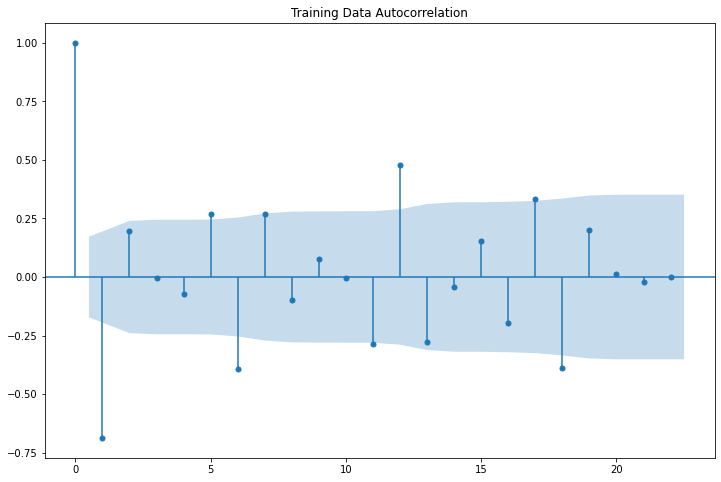

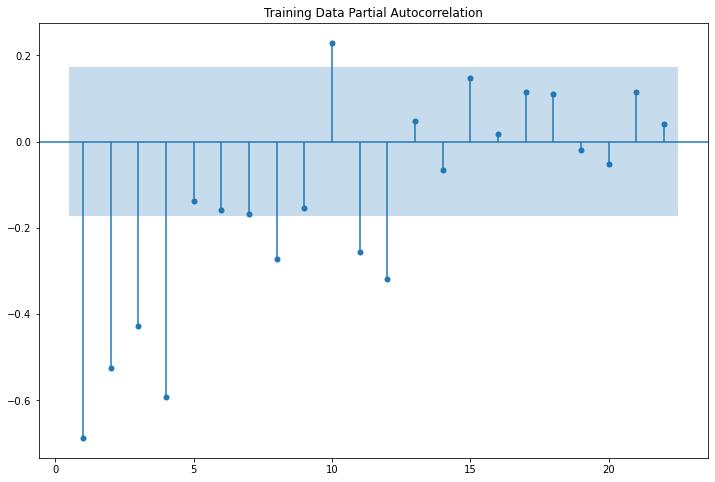

In [132]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We are taking the p value to be 4 and the q value also to be 1 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 4.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [133]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(4,2,1),
                                seasonal_order=(0, 0, 4, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                          SARIMAX Results                                           
Dep. Variable:                                   Shoe_Sales   No. Observations:                  130
Model:             SARIMAX(4, 2, 1)x(0, 0, [1, 2, 3, 4], 6)   Log Likelihood                -609.218
Date:                                      Fri, 07 Jan 2022   AIC                           1238.437
Time:                                              11:28:11   BIC                           1264.686
Sample:                                          03-01-1980   HQIC                          1249.066
                                               - 12-01-1990                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5860      0.070  

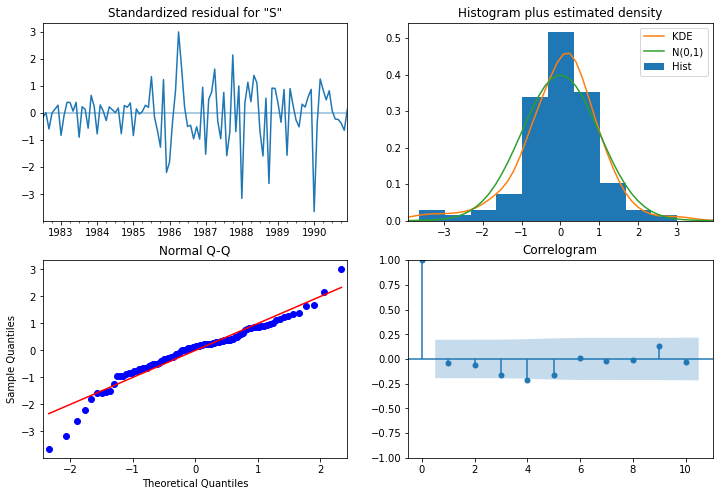

In [134]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [135]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [136]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 248.28653369654742 
MAPE: 102.89823060791588


In [137]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(4,2,1)(0,0,4,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,RMSE,MAPE
"ARIMA(1,2,3)",243.931319,101.051891
"ARIMA(4,2,1)",224.556805,92.500224
"SARIMA(1,2,3)(1,0,3,6)",270.784808,105.696366
"SARIMA(4,2,1)(0,0,4,6)",248.286534,102.898231


In [138]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse]},index=['SARIMA(4,2,1)(0,0,4,6)By looking ACF and PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836
"Alpha=1,Beta=0.0189:DES",266.161208
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",128.992526
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",83.734048
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
2pointTrailingMovingAverage,45.948736
4pointTrailingMovingAverage,57.872686
6pointTrailingMovingAverage,63.456893


This is where our model building exercise ends. 

### Building the most optimum model on the Full Data.

The models chosen are:
- Triple Exponential Smoothing
- ARIMA (4,2,1) By looking at ACF and PACF

# Triple Exponential Smoothing

In [177]:
# Initializing the Triple Exponential Smoothing Model
model_TES_forecast = ExponentialSmoothing(bgl,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_forecast = model_TES_forecast.fit()

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters')
print('')
print(model_TES_forecast.params)


Holt Winters model Exponential Smoothing Estimated Parameters

{'smoothing_level': 0.47720093702826255, 'smoothing_trend': 0.0001977869312153477, 'smoothing_seasonal': 0.19451739617511923, 'damping_trend': nan, 'initial_level': 113.94053794303379, 'initial_trend': -0.07478955626963096, 'initial_seasons': array([1.03546746, 1.01094033, 1.19429513, 1.34945025, 1.23147514,
       1.10228324, 1.20227807, 1.44917458, 1.69843265, 1.5736207 ,
       1.79969907, 1.99477607]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [188]:
print(model_TES_forecast.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Shoe_Sales   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                         404260.091
Optimized:                         True   AIC                           1467.918
Trend:                         Additive   BIC                           1519.616
Seasonal:                Multiplicative   AICC                          1471.989
Seasonal Periods:                    12   Date:                 Fri, 07 Jan 2022
Box-Cox:                          False   Time:                         13:43:37
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4772009                alpha                 True
smoothing_trend          

In [189]:
TES_predict_forecast =  model_TES_forecast.forecast(steps=12)
TES_predict_forecast

1995-08-01    270.249393
1995-09-01    274.818008
1995-10-01    283.391171
1995-11-01    331.225724
1995-12-01    420.357117
1996-01-01    197.049744
1996-02-01    244.959895
1996-03-01    215.137908
1996-04-01    230.916631
1996-05-01    206.490242
1996-06-01    207.435175
1996-07-01    270.997005
Freq: MS, dtype: float64

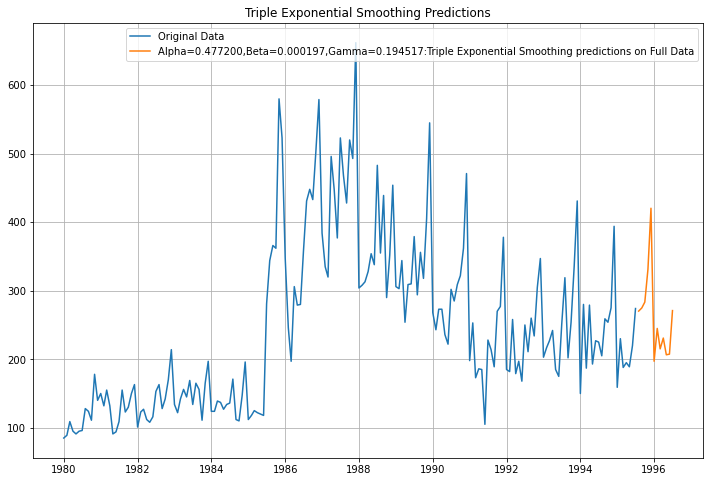

In [190]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(bgl, label='Original Data')

plt.plot(TES_predict_forecast, label='Alpha=0.477200,Beta=0.000197,Gamma=0.194517:Triple Exponential Smoothing predictions on Full Data')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [192]:
pred = TES_predict_forecast.summary_frame(alpha=0.05)
pred.head()

AttributeError: 'Series' object has no attribute 'summary_frame'

In [184]:
rmse = mean_squared_error(bgl['Shoe_Sales'],TES_predict_forecast,squared=False)
print('RMSE of the Full Model',rmse)
#print('TES RMSE:',mean_squared_error(TES_predict_forecast.values,bgl.values,squared=False))

ValueError: Found input variables with inconsistent numbers of samples: [187, 12]

# ARIMA (4,2,1) By looking at ACF and PACF

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [148]:
dftest = adfuller(bgl,regression='ct')
print('DataFrame test statistic is %3.3f' %dftest[0])
print('DataFrame test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DataFrame test statistic is -1.577
DataFrame test p-value is 0.8014186234536529
Number of lags used 13


In [149]:
fn = bgl.diff().dropna()
dftest = adfuller(fn,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.532
DF test p-value is 0.03611703400135922
Number of lags used 12


In [150]:
manual_ARIMA = ARIMA(fn['Shoe_Sales'], order=(4,2,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  186
Model:                 ARIMA(4, 2, 1)   Log Likelihood               -1076.086
Date:                Fri, 07 Jan 2022   AIC                           2164.173
Time:                        11:49:24   BIC                           2183.462
Sample:                    02-01-1980   HQIC                          2171.991
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1747      0.059    -19.955      0.000      -1.290      -1.059
ar.L2         -1.0242      0.093    -11.024      0.000      -1.206      -0.842
ar.L3         -0.7684      0.095     -8.106      0.0

###### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

## Evaluate the model on the whole data and predict 12 months into the future

In [158]:
predicted_manual_ARIMA_full_data = results_manual_ARIMA.get_forecast(steps=12)

In [194]:
predicted_manual_ARIMA_full_data

In [152]:
pred_full_manual_ARIMA_date = predicted_manual_ARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_ARIMA_date.head()

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,-18.833899,81.866634,-179.289552,141.621755
1995-09-01,19.926323,83.029861,-142.809213,182.661860
1995-10-01,17.876591,84.407877,-147.559809,183.312991
1995-11-01,28.326744,86.032906,-140.294653,196.948141
1995-12-01,15.841750,90.689143,-161.905704,193.589205


In [196]:
pred_full_manual_ARIMA_date

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,-18.833899,81.866634,-179.289552,141.621755
1995-09-01,19.926323,83.029861,-142.809213,182.661860
1995-10-01,17.876591,84.407877,-147.559809,183.312991
1995-11-01,28.326744,86.032906,-140.294653,196.948141
1995-12-01,15.841750,90.689143,-161.905704,193.589205
1996-01-01,7.285493,94.574416,-178.076957,192.647943
1996-02-01,23.200987,94.713019,-162.433120,208.835093
1996-03-01,19.311566,97.502465,-171.789754,210.412887
1996-04-01,19.148811,99.862664,-176.578413,214.876035
1996-05-01,14.625026,102.426679,-186.127576,215.377628


In [198]:
pred_full_manual_ARIMA_date['mean_se'].mean()

93.7017878657572

In [161]:
rmse = mean_squared_error(fn['Shoe_Sales'],results_manual_ARIMA.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 81.77465976241241


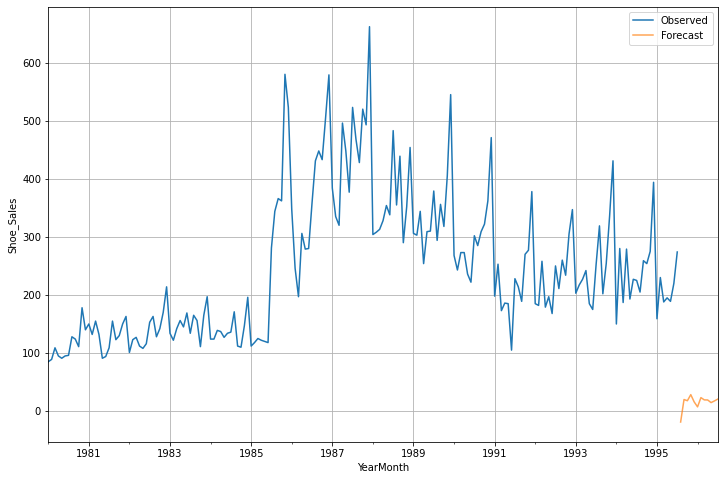

In [162]:
axis = bgl['Shoe_Sales'].plot(label='Observed')
pred_full_manual_ARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Shoe_Sales')
plt.legend(loc='best')
plt.grid();

In [163]:
resultsDf

,Test RMSE
"Alpha=0.605049,SES",196.404836
"Alpha=1,Beta=0.0189:DES",266.161208
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",128.992526
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",83.734048
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
2pointTrailingMovingAverage,45.948736
4pointTrailingMovingAverage,57.872686
6pointTrailingMovingAverage,63.456893


# END